<center>
<h1>Data Science Lab on Smart Cities</h1>
<i>Introduction and Playground</i>
</center>

In [1]:
# imports

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import os

import geopandas as gpd

<center>
<h3>Introduction to GeoPandas</h3>
</center>

Geopandas supports all the vector format offered by the [fiona project](https://github.com/Toblerity/Fiona) or [gdal/ogr](https://www.gdal.org/ogr_formats.html).

The foundation of **vector** graphics is a vertex or point that is typically denoted by an X and Y coordinate. 
In a GIS, X represents longitude and Y represents latitude, and these coordinates are relative to a **spatial reference, or projection**.

Geometric figures in vector format consist of points in plane space. The lines connecting these points are specified implicitly by equations. In raster images, on the other hand, each point must be represented explicitly. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Raster_vector_tikz.png"  width="40%" height="10%"></center>

**Data Exploration**

In [2]:
# explore ISTAT data

os.listdir('../data/raw/Limiti01012023')

['Com01012023', 'ProvCM01012023', 'Reg01012023', 'RipGeo01012023']

Limiti01012023 is main folder with all the administrative borders of Italy in 2023.

- _RipGeo01012023_<br/>
folder with boundary info about the macro-regions of Italy
- _Reg01012023_<br/>
folder with the regions of Italy
- _ProvCM01012023_<br/>
folder with the provinces of Italy
- _Com01012023_<br/>
folder with the municipalities of Italy

In [3]:
# look inside the municipalities
os.chdir('../data/raw/Limiti01012023/')
os.chdir('Com01012023')

# show only the files
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

Com01012023_WGS84.dbf
Com01012023_WGS84.prj
Com01012023_WGS84.shp
Com01012023_WGS84.shx


**ESRI Shapefile**

What we see is the so-called *ESRI Shapefile* (an old but common used format for the geospatial vector data).

The format is proprietary and some format specifications are public. We can see that a "ESRI Shapefile" is a collection of different files with the same name and different extensions.

All files of a Shapefile **must** have the exact same name. They have different extensions, though. 

The public specifications are for the extensions:

| extension | meaning       | content of the file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape         | the geometries (point, line, polygon)                                |
| .dbf      | database file | the attributes to associate with the geometries                      |
| .shx      | shape indices | the indices to join the geometries with the attributes               |
| .prj      | projection    | metadata that utilizes well-known text to store information related to the projection and coordinate reference system |


To manage the data are _necessary_ 3 files (*.shp, .shx, and .dbf*), however the *.prj* file is crucial to analyze the data togheter with other sources.

In [4]:
# read the file

municipalities = gpd.read_file('Com01012023_WGS84.shp')

In [5]:
type(municipalities)

geopandas.geodataframe.GeoDataFrame

Geopandas transforms everything in a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe).

A geodataframe is a Pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the column "geometry" and special geospatial methods.

<center><img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*x9gF-ZVR4JMAv3cTH6LtfA.png"  width="40%" height="30%"></center>

In [6]:
municipalities

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,Shape_Le_1,geometry
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,18164.369945,18164.236621,"POLYGON ((414358.390 5042001.044, 414381.796 5..."
1,1,1,1,201,201,1079,001079,Chiesanuova,NaN,0,10777.398475,10777.318814,"POLYGON ((394621.039 5031581.116, 394716.100 5..."
2,1,1,1,201,201,1089,001089,Coazze,NaN,0,41591.434852,41591.122092,"POLYGON ((364914.897 4993224.894, 364929.991 4..."
3,1,1,1,201,201,1006,001006,Almese,NaN,0,17058.567837,17058.439037,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
4,1,1,1,201,201,1007,001007,Alpette,NaN,0,9795.635259,9795.562269,"POLYGON ((388890.737 5030465.123, 388945.987 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7896,3,12,58,258,258,58081,058081,Riano,NaN,0,30941.918435,31158.226031,"POLYGON ((791585.579 4667342.828, 791638.892 4..."
7897,1,3,19,0,19,19033,019033,Corte de' Frati,NaN,0,28061.560338,24096.060694,"POLYGON ((587777.193 5006301.809, 587673.194 5..."
7898,5,19,81,0,81,81025,081025,Misiliscemi,NaN,1,163587.188964,51956.554574,"POLYGON ((810124.360 4208431.532, 810129.952 4..."
7899,5,19,81,0,81,81021,081021,Trapani,NaN,1,163587.188964,120144.721639,"MULTIPOLYGON (((823256.854 4207706.127, 823282..."


A GeoDataFrame can be plotted as it contains geometry information.

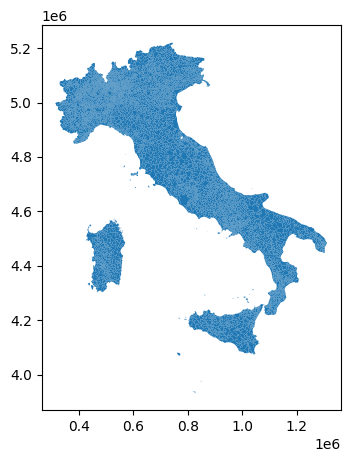

In [7]:
municipalities.plot(figsize=(5,5))
plt.show()

We can also use the more **classic methods of the pandas DataFrame**.

For instance, we can extract a sub (geo)DataFrame by filtering on an attribute

In [8]:
# get the municipalities' names
municipalities.COMUNE

0            Chiaverano
1           Chiesanuova
2                Coazze
3                Almese
4               Alpette
             ...       
7896              Riano
7897    Corte de' Frati
7898        Misiliscemi
7899            Trapani
7900           Trepuzzi
Name: COMUNE, Length: 7901, dtype: object

In [9]:
municipalities.geom_type

0            Polygon
1            Polygon
2            Polygon
3            Polygon
4            Polygon
            ...     
7896         Polygon
7897         Polygon
7898         Polygon
7899    MultiPolygon
7900    MultiPolygon
Length: 7901, dtype: object

In an *ESRI shapefile* the kind of geometry *is always the same*, but a *geodataframe* is more general and can contain *mixed geometries*.

The geometries allowed are:

|geometry|images|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/docs/assets/images/linering.png)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png) 
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)| 
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)| 
| GEOMETRYCOLLECTION |![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/SFA_GeometryCollection.svg/51px-SFA_GeometryCollection.svg.png) | 

note: table based on the wikipedia page [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

**Spatial Projections**

CRS = *Coordinate Reference System* 

CRS information has three components:

- _Datum_: A model of the shape of the earth. It has angular units (i.e. degrees) and defines the starting point (i.e. where is (0,0)?) so the angles reference a meaningful spot on the earth. Common global datums are WGS84 and NAD83. Datums can also be local - fit to a particular area of the globe, but ill-fitting outside the area of intended use. In this workshop, we will use the WGS84 datum.

- _Projection_: A mathematical transformation of the angular measurements on a round earth to a flat surface (i.e. paper or a computer screen). The units associated with a given projection are usually linear (feet, meters, etc.). In this workshop, we will see data in two different projections.

- _Additional Parameters_: Additional parameters are often necessary to create the full coordinate reference system. One common additional parameter is a definition of the center of the map. The number of required additional parameters depends on what is needed by each specific projection.

The Earth isn't flat, the true size...

![](https://github.com/napo/geospatial_course_unitn/raw/master/docs/assets/images/truesize.gif)

https://thetruesize.com/

**How to convert in Latitude/Longitude?**

In [10]:
# find out which crs is used in the ISTAT shapefile
municipalities.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**EPSG?**

European Petroleum Survey Group  (1986-2005) - [IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

An important project is the [EPSG registry](https://epsg.org/home.html) - the dataset of geodetic parameters.

[http://epsg.io/32632](http://epsg.io/32632)

![](https://github.com/napo/geospatial_course_unitn/raw/master/docs/assets/images/epsg32632.png)

WGS 1984 is a global ellipsoid model, which is an extremely precise model of the Earth’s surface. WGS 1984 is leveraged as the de facto GCS in most web and mobile mapping applications, including Google Maps, Waze, and Bing Maps.

The Universal Transverse Mercator (UTM) is a map projection system for assigning coordinates to locations on the surface of the Earth. Like the traditional method of latitude and longitude, it is a horizontal position representation, which means it ignores altitude and treats the earth as a perfect ellipsoid. However, it differs from global latitude/longitude in that it divides earth into 60 zones and projects each to the plane as a basis for its coordinates. Specifying a location means specifying the zone and the x, y coordinate in that plane. 

**WGS84 VS ETRS89**

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/wgs84_coverage.png?raw=true) | ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/etrs89_coverage.png?raw=true)  

**Exploring the `.prj` file**

In [11]:
f = open('Com01012023_WGS84.prj','r')

In [12]:
f.read()

'PROJCS["WGS_1984_UTM_Zone_32N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'

<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A <b>GeoDataFrame</b> allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A <b>GeoDataFrame</b> (or <i>Feature Collection</i>) consists of:
   <ul>
    <li> <b>Geometries</b>  or <b>features</b>: the spatial objects</li>
    <li> <b>Attributes</b> or  <b>properties</b>: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

**Save the Geodataframe**

*Geographic JavaScript Object Notation (GeoJSON)* is the geographic sibling of the more common JavaScript Object Notation (JSON). GeoJSON formats are mostly used for web-based mapping as web browsers understand how to interpret JavaScript. GeoJSON file formats store the coordinates of the geometry as well as the columnar attribute information related to those geometries as text within curly braces: {}. 

In [ ]:
# municipalities.to_crs(epsg=xxxx).to_file('../data_municipalities.geojson', driver='GeoJSON')

Output Formats: the library <b>fiona</b> offers different kind of output formats.

In [ ]:
# import fiona
# fiona.supported_drivers

In [ ]:
# enable the support for the KML format

## fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
## fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by default

# download file - uncomment the next lines if you want download the file from google colab

## from google.colab import files
## files.download('macro_regions.geojson') 

... and visualize it on http://geojson.io


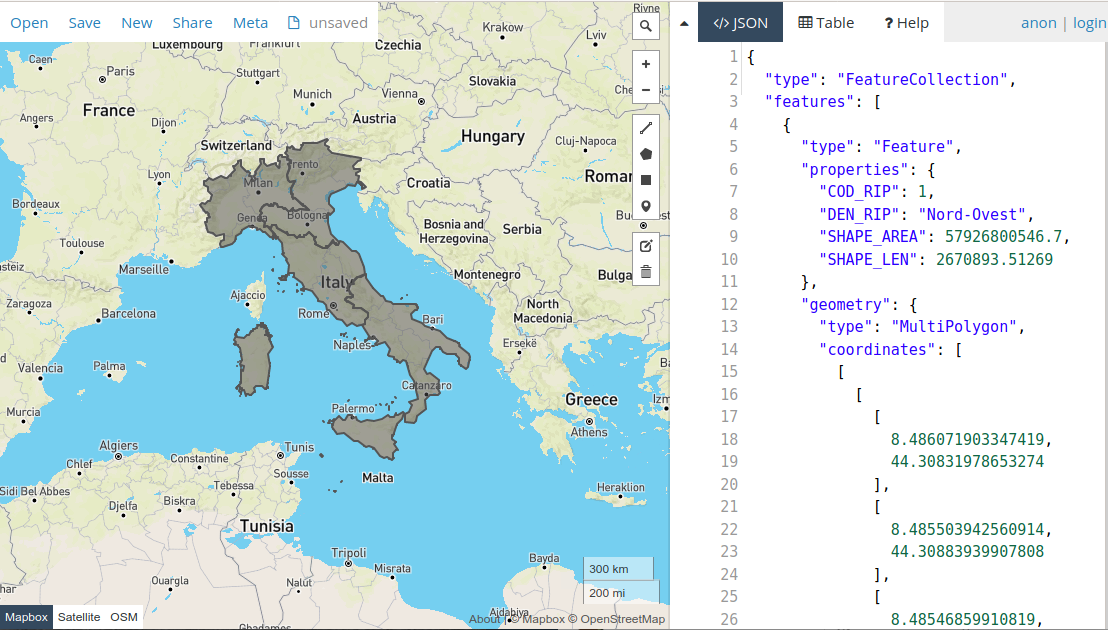

**Other Examples**

Explore _Natural Earth Data_
<img src="https://www.naturalearthdata.com/wp-content/uploads/2009/08/NEV-Logo-Black.png" width="50px"/>

[naturalearthdata.com](https://www.naturalearthdata.com/) | [url_dispusted_areas](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_disputed_areas.zip)


**Provinces**

In [13]:
# read the file

provinces = gpd.read_file('../ProvCM01012023/')

In [14]:
provinces.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Ar_1,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,6.826908e+09,"POLYGON ((411015.006 5049970.983, 411070.006 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,2.081602e+09,"POLYGON ((437900.552 5088796.204, 437915.021 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,1.340250e+09,"POLYGON ((459146.367 5079451.275, 459180.648 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.894828e+09,6.894828e+09,"MULTIPOLYGON (((378928.552 4958539.163, 378934..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.510170e+09,1.510170e+09,"POLYGON ((423634.299 4998152.373, 423642.986 4..."


In [15]:
provinces.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'DEN_PROV',
       'DEN_CM', 'DEN_UTS', 'SIGLA', 'TIPO_UTS', 'SHAPE_AREA', 'Shape_Ar_1',
       'geometry'],
      dtype='object')

- COD_RIP<br/>
*codice ripartizione*<br/>
numeric code of the macroregion of belonging

- COD_REG<br/>
*codice regione*<br/>
numeric code of the region of belonging

- COD_PROV<br/>
*codice provincia*<br/>
numeric code of the region of belonging

- COD_CM<br/>
*codice comune*<br/>
Istat code of the metropolitan city (three characters in reference to all official statistics are numeric format) obtained by adding the value 200 to adopted the statistical codes of the cities corresponding code of the province.

- COD_UTS<br/>
*codice unità territoriali sovracomunali*<br/>
Numeric code that uniquely identifies the Units territorial supra-municipal on the national territory.

- DEN_PROV<br/>
*denominazione provincia*<br/>
name of the province

- DEN_CM<br/>
*denominazione città metropolitana*<br/>
name of the metropolitan city

- DEN_UTS<br/>
*denominazione unità territoriale sovracomunale*<br/>
Denomination of the supra-municipal territorial units

- SIGLA<br/>
*sigla*<br/>
abbreviation

- TIPO_UTS<br/>
*tipologia unità territoriale sovracomunale*<br/>
kind of supra-municipal territorial units

In [16]:
# get the list of all the provinces

provinces['DEN_PROV'].unique()

array(['-', 'Vercelli', 'Novara', 'Cuneo', 'Asti', 'Alessandria', 'Aosta',
       'Imperia', 'Savona', 'La Spezia', 'Varese', 'Como', 'Sondrio',
       'Bergamo', 'Brescia', 'Pavia', 'Cremona', 'Mantova', 'Bolzano',
       'Trento', 'Verona', 'Vicenza', 'Belluno', 'Treviso', 'Padova',
       'Rovigo', 'Udine', 'Gorizia', 'Trieste', 'Piacenza', 'Parma',
       "Reggio nell'Emilia", 'Modena', 'Ferrara', 'Ravenna',
       "Forli'-Cesena", 'Pesaro e Urbino', 'Ancona', 'Macerata',
       'Ascoli Piceno', 'Massa Carrara', 'Lucca', 'Pistoia', 'Livorno',
       'Pisa', 'Arezzo', 'Siena', 'Grosseto', 'Perugia', 'Terni',
       'Viterbo', 'Rieti', 'Latina', 'Frosinone', 'Caserta', 'Benevento',
       'Avellino', 'Salerno', "L'Aquila", 'Teramo', 'Pescara', 'Chieti',
       'Campobasso', 'Foggia', 'Taranto', 'Brindisi', 'Lecce', 'Potenza',
       'Matera', 'Cosenza', 'Catanzaro', 'Trapani', 'Agrigento',
       'Caltanissetta', 'Enna', 'Ragusa', 'Siracusa', 'Sassari', 'Nuoro',
       'Pordenone', '

In [17]:
# get the list of all the metropolitan cities

provinces.DEN_CM.unique()

array(['Torino', '-', 'Genova', 'Milano', 'Venezia', 'Bologna', 'Firenze',
       'Roma', 'Napoli', 'Bari', 'Reggio di Calabria', 'Palermo',
       'Messina', 'Catania', 'Cagliari'], dtype=object)

In [18]:
# choose the metropolitan city of Milano

metropolitanCity_CG = provinces[provinces['DEN_CM']=='Cagliari']

In [19]:
metropolitanCity_CG

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Ar_1,geometry
91,5,20,92,292,292,-,Cagliari,Cagliari,CA,Citta metropolitana,1.248660e+09,1.248660e+09,"MULTIPOLYGON (((502067.461 4315091.145, 502029..."


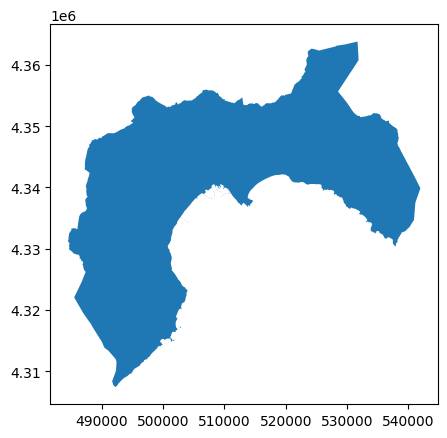

In [20]:
metropolitanCity_CG.plot(figsize=(5,5))
plt.show()

**Municipalities**

In [21]:
municipalities.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'SHAPE_LENG', 'Shape_Le_1',
       'geometry'],
      dtype='object')

- COD_RIP<br/>
*codice ripartizione*<br/>
numeric code of the macroregion of belonging

- COD_REG<br/>
*codice regione*<br/>
numeric code of the region of belonging

- COD_PROV<br/>
*codice provincia*<br/>
numeric code of the region of belonging

- COD_CM<br/>
*codice comune*<br/>
unique numeric identification code of the municipality within the province of belonging

- COD_UTS<br/>
*codice unità territoriali sovracomunali*<br/>
Numeric code that uniquely identifies the Units territorial supra-municipal on the national territory.

- PRO_COM<br/>
*provincia comune**<br/>
Numeric code that uniquely identifies the Municipality on the national territory. (= COD_PROV & COD_COM) 

- PRO_COM_T<br/>
*provincia comune territorio**<br/>
Alphanumeric code that uniquely identifies the Municipality on the national territory.<br/>
Like PRO_COM but definied in 6 fixed characters.

- COMUNE<br/>
*comune*<br/>
Name of the Municipality

- COMUNE_A<br/>
*comune alternativa*<br/>
Name of the Municipality in a language other than Italian

- CC_UTS<br/>
*comune capoluogo*<br/>
Provincial capital or metropolitan city<br/>
1 => True<br/>
2 => False

In [22]:
# COD_PROV for Cagliari is 92

municipalities_CG = municipalities[municipalities.COD_PROV==92]
municipalities_CG.shape

(17, 13)

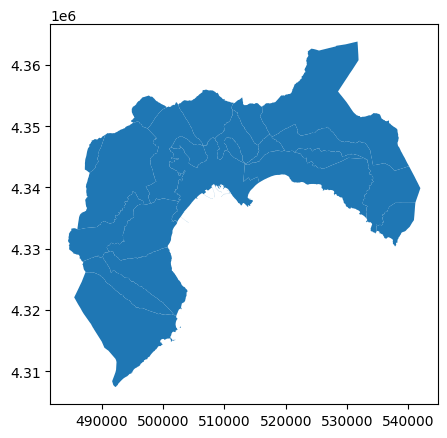

In [23]:
municipalities_CG.plot(figsize=(5,5))
plt.show()

**Max Area | Min Area**

In [24]:
max_area_CG = municipalities_CG.geometry.area.max()
print(max_area_CG)

223907957.19273573


In [25]:
min_area_CG = municipalities_CG.geometry.area.min()
print(min_area_CG)

6421746.251832471


In [26]:
max_area_municipality_CG = municipalities_CG[municipalities_CG.geometry.area == max_area_CG]
print(max_area_municipality_CG)

      COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  COMUNE  \
7777        5       20        92     292      292    92080    092080  Sinnai   

     COMUNE_A  CC_UTS     SHAPE_LENG     Shape_Le_1  \
7777      NaN       0  111920.980003  111920.068151   

                                               geometry  
7777  MULTIPOLYGON (((531775.221 4363164.750, 531842...  


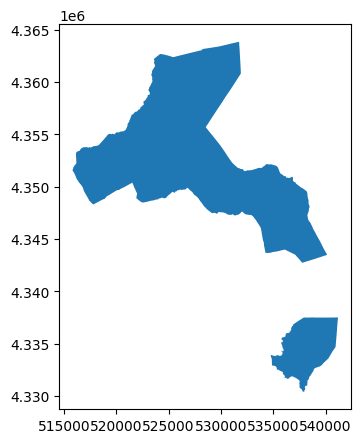

In [27]:
max_area_municipality_CG.plot(figsize=(5,5))
plt.show()

In [28]:
min_area_municipality_CG = municipalities_CG[municipalities_CG.geometry.area == min_area_CG]
print(min_area_municipality_CG)

      COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
7128        5       20        92     292      292    92109    092109   

          COMUNE COMUNE_A  CC_UTS    SHAPE_LENG    Shape_Le_1  \
7128  Monserrato      NaN       0  12406.355622  12406.254334   

                                               geometry  
7128  POLYGON ((510782.015 4348052.874, 510796.140 4...  


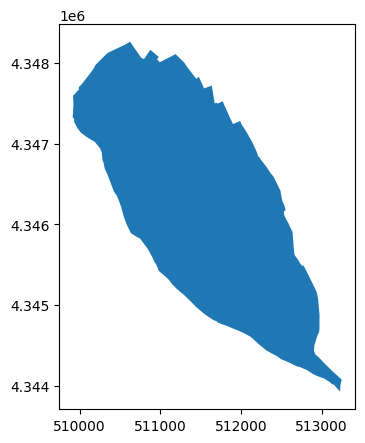

In [29]:
min_area_municipality_CG.plot(figsize=(5,5))
plt.show()

In [ ]:
# extract all the centroids of the areas expressed in WGS84

max_area_municipality_CG.geometry.centroid.to_crs(epsg=4326)

In [30]:
# extract all the centroids of the areas expressed in WGS84

min_area_municipality_CG.geometry.centroid.to_crs(epsg=4326)

7128    POINT (9.13341 39.26587)
dtype: geometry

In [31]:
# extract a rappresenative point for the area of the smallest and bigger municipality in WGS84

rep_point_max_area_municipality_CG = max_area_municipality_CG.geometry.representative_point()

rep_point_min_area_municipality_CG = min_area_municipality_CG.geometry.representative_point()

In [32]:
print(rep_point_max_area_municipality_CG.to_crs(epsg=4326))
print(rep_point_min_area_municipality_CG.to_crs(epsg=4326))

7777    POINT (9.27028 39.32847)
dtype: geometry
7128    POINT (9.13389 39.26403)
dtype: geometry


In [33]:
# save the data in GeoJSON files - we can save each point in GeoJSON

points = pd.concat([rep_point_max_area_municipality_CG, rep_point_min_area_municipality_CG])
points

7777    POINT (523295.658 4353263.331)
7128    POINT (511550.554 4346085.637)
dtype: geometry

In [34]:
os.chdir('..')

In [ ]:
# points.to_crs(epsg=4326).to_file("../data/points.geojson", driver="GeoJSON")

In [35]:
# the same with the polygons

polygons = pd.concat([max_area_municipality_CG, min_area_municipality_CG])

In [ ]:
# polygons.to_crs(epsg=4326).to_file("../data/polygons.geojson", driver="GeoJSON")

*Tip 1*:<br/>
you can download, open with [geojson.io](https://geojson.io) and create a [gist resource](https://gist.github.com/napo/b1d3b879bd0a93cbd3ae06be462bc873) to distribute.

*Tip 2*:<br/>
you can download the files and create a map with [umap](https://umap.openstreetmap.fr/it/) and create an [interactive map online with the data](http://umap.openstreetmap.fr/en/map/municipalities-of-the-province-of-trento_663616#11/46.1901/11.6750).

**Distance**

In [36]:
# calculate the distance on the geodentic between the municipality with the largest and smallest areas using the centroid

to_point = min_area_municipality_CG.geometry.centroid.values[0]
type(to_point)

shapely.geometry.point.Point

In [37]:
max_area_municipality_CG.geometry.centroid.distance(to_point)

7777    18029.522064
dtype: float64

In [38]:
distance = max_area_municipality_CG.geometry.centroid.distance(to_point).values[0]
distance

18029.522064484343

The distance is in Meters due the CRS used on the dataset.

In [39]:
to_city = min_area_municipality_CG.COMUNE.values[0]
from_city = max_area_municipality_CG.COMUNE.values[0]
distance_km = distance/1000

print("The distance from %s to %s is %.1f km." % (from_city, to_city, round(distance_km,1)))

The distance from Sinnai to Monserrato is 18.0 km.


_Why a Representative Point?_

The representative point is the one that is halfway along the longest segment on the line that intersects the polygon in the middle on the east-west direction.

More details [here](https://gis.stackexchange.com/questions/414260/how-does-geopandas-representative-point-work).

<center>
<h3>Spatial Relationships and Operations</h3>
</center>

For spatial operations we need to improve GeoPandas with some libraries.

**RTree**

Pyton RTree is a wrapper to the library [libspatialindex](https://libspatialindex.org/en/latest/). 
The purpose of libspatiali is to provide:
- Support for spatial indexing methods.
- Support for spatial queries. Range, point location, nearest neighbor and k-nearest neighbor.

If you want use [rtree](https://rtree.readthedocs.io/en/latest/) you need also to install a C library in your OS.
If you are using a Linux distribution based on Debian (like the instance of Google Colab) you have to install the libspatialindex library beforehand.

In [40]:
import rtree

When we have two layers with different objects, we can ask ourselves in what relation these objects are to each other.

**Spatial Relationships**

A spatial relation specifies how some object is located in space in relation to some reference object. 

Commonly used types of spatial relations are: topological, directional and distance relations.

**Topological Relations**

Space relations that are invariant to rotation, translation and scaling transformations.

![](https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png)